In [ ]:
from google.colab import drive
import pandas as pd  

In [ ]:
drive.mount('/content/gdrive')
!touch "/content/gdrive/MyDrive/files"

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/test/dataa.csv")
data = data.drop(['Unnamed: 0'],axis=1)
data.head()

,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status,...,meds_musclerelaxants,meds_pre-natalvitamins,meds_psychotherapeuticdrugs,meds_sedative/hypnotics,meds_skinpreps,meds_smokingdeterrents,meds_thyroidpreps,meds_unclassifieddrugproducts,meds_vitamins,n_surgeries
0,4.0,40.0,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,Other,...,0,0,0,0,0,0,0,0,0,1
1,4.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,...,0,0,0,0,0,0,0,0,0,2
2,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,...,0,0,0,0,0,0,0,0,0,2
3,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,...,0,0,0,0,0,0,0,0,0,2
4,3.0,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,...,0,0,0,1,0,0,0,0,1,5


In [ ]:
data = data.drop(["race","lang","employstatus","ethnicity"], axis=1)

In [ ]:
gender = {'Male': 0,'Female': 1}
data['gender']=data['gender'].map(gender)


religion= {'None':0, 'Pentecostal':1, 'Catholic':2, 'Protestant':3, 'Christian':4,
       'Other':5, 'Unknown':6, 'Baptist':7, 'Methodist':8, 'Episcopal':9, 'Jewish':10,
       'Muslim':11, "Jehovah's Witness":12}
data['religion']=data['religion'].map(religion)

maritalstatus= {'Single':0, 'Married':1, 'Widowed':2, 'Significant Other':3, 'Divorced':4,
       'Legally Separated':5, 'Other':6, 'Unknown':7, 'Life Partner':8,
       'Civil Union':9}
data['maritalstatus']=data['maritalstatus'].map(maritalstatus)

insurance_status= {'Other':0, 'Commercial':1, 'Medicare':2, 'Medicaid':3, 'Self pay':4}
data['insurance_status']=data['insurance_status'].map(insurance_status)

disposition= {'Discharge':0, 'Admit':1}
data['disposition']=data['disposition'].map(disposition)

previousdispo	= {'No previous dispo':0, 'Discharge':1, 'Admit':2,
       'Transfer to Another Facility':3, 'AMA':4, 'LWBS after Triage':5,
       'Eloped':6, 'LWBS before Triage':7, 'Observation':8, 'Send to L&D':9}
data['previousdispo']=data['previousdispo'].map(previousdispo)


In [ ]:
data = data.drop_duplicates()

In [ ]:
perc = 1
min_count = int(((100-perc)/100)*data.shape[1] + 1)
data = data.dropna( axis=0,thresh=min_count)

In [ ]:
X = data.drop(['disposition'],axis=1)
y = data.disposition.values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=123)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [ ]:
# remove constant features
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((364846, 58), (91212, 58))

In [ ]:
# remove quasi-constant features
# 0.1 indicates 99% of observations approximately
sel = VarianceThreshold(threshold=0.01)  
# fit finds the features with low variance
sel.fit(X_train)  
sum(sel.get_support()) 

43

In [ ]:
features_to_keep = X_train.columns[sel.get_support()]

In [ ]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((364846, 43), (91212, 43))

In [ ]:
X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep
X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

In [ ]:
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30
40


0

In [ ]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((364846, 43), (91212, 43))

In [ ]:
X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

In [ ]:
roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

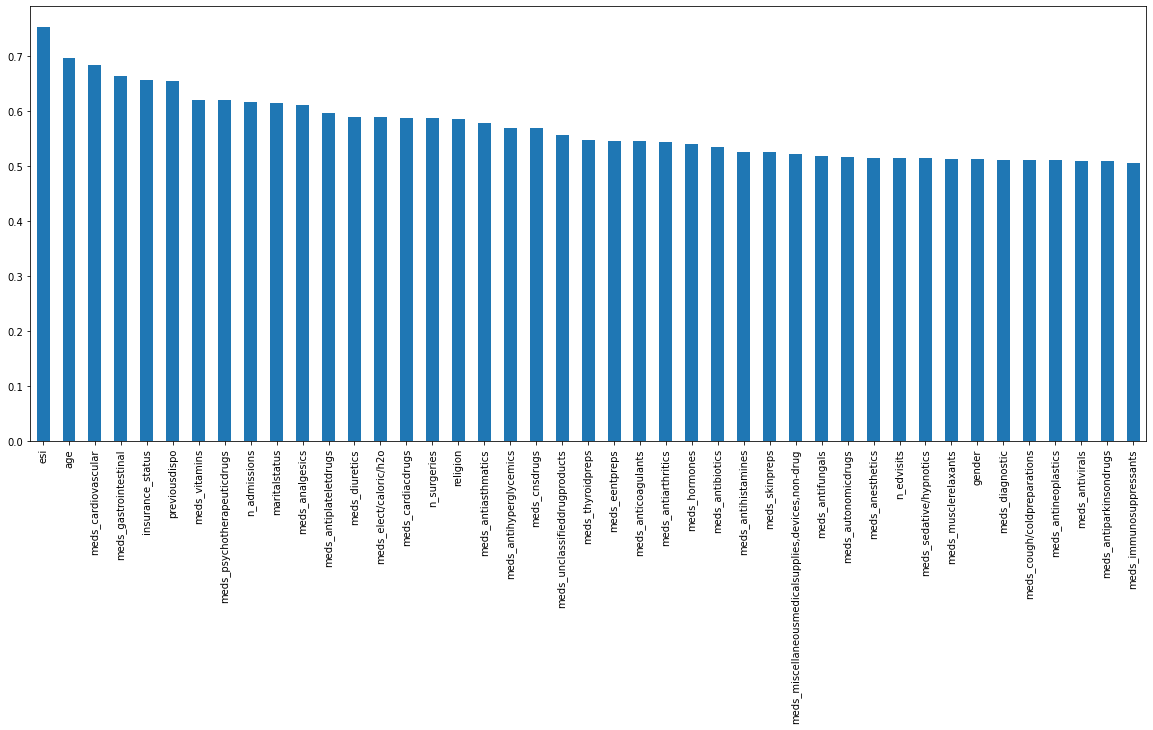

In [ ]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
# by removing features with univariate roc_auc == 0.5
selected_feat = roc_values[roc_values>0.5]
len(selected_feat), X_train.shape[1]

(43, 43)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [ ]:
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

In [ ]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [ ]:
# original
run_randomForests(X_train_original, X_test_original,y_train, y_test)

Train set
Random Forests roc-auc: 0.8734120428698694
Test set
Random Forests roc-auc: 0.872817140139353


In [ ]:
run_randomForests(X_train_basic_filter,
                  X_test_basic_filter,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8765106867700307
Test set
Random Forests roc-auc: 0.8761214969941713


In [ ]:
# filter methods - univariate roc-auc
run_randomForests(X_train[selected_feat.index],
                  X_test_corr[selected_feat.index],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8765106867700307
Test set
Random Forests roc-auc: 0.8761214969941713


In [ ]:
def run_logistic(X_train, X_test, y_train, y_test):
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [ ]:
scaler = StandardScaler().fit(X_train_original)

run_logistic(scaler.transform(X_train_original),
             scaler.transform(X_test_original),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8887740715972269
Test set
Logistic Regression roc-auc: 0.8874893957471057


In [ ]:
scaler = StandardScaler().fit(X_train_basic_filter)

run_logistic(scaler.transform(X_train_basic_filter),
             scaler.transform(X_test_basic_filter),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.888433181169729
Test set
Logistic Regression roc-auc: 0.8872412549998794


In [ ]:
scaler = StandardScaler().fit(X_train[selected_feat.index])

run_logistic(scaler.transform(X_train[selected_feat.index]),
             scaler.transform(X_test_corr[selected_feat.index]),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.888433181169729
Test set
Logistic Regression roc-auc: 0.8872412549998794


Information Gain - Mutual Information


In [ ]:
X = data.drop(['disposition'],axis=1)
y = data.disposition.values 

In [ ]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Calculate Mutual Information between each feature and the target
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.13799379, 0.05581437, 0.0136452 , 0.01794556, 0.02873943,
       0.05426666, 0.05493129, 0.00390454, 0.02608864, 0.00063327,
       0.05962577, 0.00827046, 0.00047719, 0.00148775, 0.01612837,
       0.0383291 , 0.01583108, 0.02772766, 0.00086763, 0.01056406,
       0.        , 0.00957279, 0.03597448, 0.0003806 , 0.00189073,
       0.00593777, 0.00412175, 0.05405795, 0.00353474, 0.00681884,
       0.00061581, 0.        , 0.05047477, 0.10466172, 0.03139627,
       0.00431637, 0.0012592 , 0.00575042, 0.00533434, 0.04900372,
       0.02295217, 0.05176707, 0.09638476, 0.00323787, 0.01923799,
       0.00291455, 0.00102862, 0.01184621, 0.00631368, 0.        ,
       0.05488734, 0.00697843, 0.01249557, 0.00237471, 0.02324737,
       0.02821821, 0.06691316, 0.01585867])

In [ ]:
# Create Feature Target Mutual Information Series
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)

esi                                                   0.137994
meds_cardiovascular                                   0.104662
meds_gastrointestinal                                 0.096385
meds_vitamins                                         0.066913
meds_analgesics                                       0.059626
age                                                   0.055814
previousdispo                                         0.054931
meds_psychotherapeuticdrugs                           0.054887
insurance_status                                      0.054267
meds_antiplateletdrugs                                0.054058
meds_elect/caloric/h2o                                0.051767
meds_cardiacdrugs                                     0.050475
meds_diuretics                                        0.049004
meds_antiasthmatics                                   0.038329
meds_antihyperglycemics                               0.035974
meds_cnsdrugs                                         0

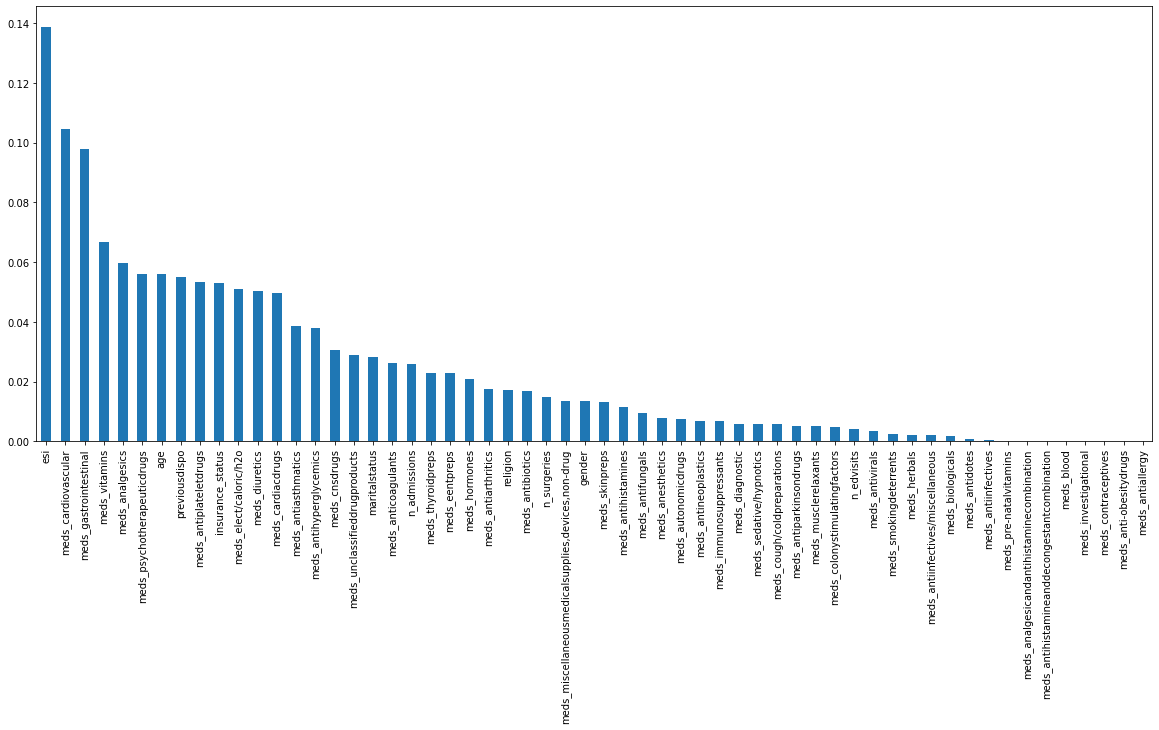

In [ ]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [ ]:
k_best_features = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)
print('Selected top 10 features: {}'.format(X_train.columns[k_best_features.get_support()]))

Selected top 10 features: Index(['esi', 'age', 'insurance_status', 'previousdispo', 'meds_analgesics',
       'meds_antiplateletdrugs', 'meds_cardiovascular',
       'meds_gastrointestinal', 'meds_psychotherapeuticdrugs',
       'meds_vitamins'],
      dtype='object')


In [ ]:
X_n = data[['esi', 'age', 'insurance_status', 'previousdispo', 'meds_analgesics',
       'meds_antiplateletdrugs', 'meds_cardiovascular',
       'meds_gastrointestinal', 'meds_psychotherapeuticdrugs',
       'meds_vitamins']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
print('Accuracy of Random Forest Classifier on training set: {:.5f}'.format(RFC.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.5f}'.format(RFC.score(X_test, y_test)))

Accuracy of Random Forest Classifier on training set: 0.85940
Accuracy of Random Forest Classifier on test set: 0.81590
